In [52]:
import spacy

# Load spaCy's pre-trained model with word vectors
nlp = spacy.load('en_core_web_md')

# Process a sentence to get its embedding
sentence = "This is an example sentence."
doc = nlp(sentence)

# Get the embedding of the entire sentence
sentence_embedding = doc.vector
print(len(sentence_embedding))

# Get lemma forms of tokens in the vocabulary
lemma_forms = [lexeme.text for lexeme in nlp.vocab]

# Convert lemma forms to strings
lemma_strings = [str(lemma) for lemma in lemma_forms]

# Print some example lemma strings
print("Some example lemma strings:", lemma_strings[:10])


300
Some example lemma strings: ['nuthin', 'ü.', 'p.m', 'Kan', 'Mar', "When's", ' ', 'Sept.', 'c.', 'Mont.']


In [35]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 9.3/9.3 MB 1.1 MB/s eta 0:00:00
     ------------------------------------ 301.2/301.2 kB 887.0 kB/s eta 0:00:00


In [42]:
doc.vector.shape

(300,)

In [ ]:
# Generate a random 300-dimensional vector
vector_300d = np.random.rand(300)

# Reshape the vector to ensure it's in the correct format for PCA
vector_reshaped = vector_300d.reshape(1, -1)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2, svd_solver='full')
vector_2d = pca.fit_transform(vector_reshaped)

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(sentence_embedding).reshape(1, -1)
n, m= embedding_clusters.shape
tsne_model_en_2d = TSNE(n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n , m)))


In [ ]:
!pip install - q spacy
!python -m spacy download en_core_web_md

In [ ]:
!pip install gensim

In [59]:
import gensim
import re
import codecs
import multiprocessing
from gensim.models import Word2Vec

model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

def preprocess_text(text):
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip()


def prepare_for_w2v(filename_from, filename_to, lang):
    raw_text = codecs.open(filename_from, "r", encoding='windows-1251').read()
    with open(filename_to, 'w', encoding='utf-8') as f:
        for sentence in nltk.sent_tokenize(raw_text, lang):
            print(preprocess_text(sentence.lower()), file=f)

def train_word2vec(filename):
    data = gensim.models.word2vec.LineSentence(filename)
    return Word2Vec(data, size=200, window=5, min_count=5, workers=multiprocessing.cpu_count())

In [60]:
keys = ['Sport', 'Technology', 'Automative', 'Food', 'Health', 'Books', 'Travel', 'Finance', 'Entertainment',
        'Fashion', 'Energy']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [61]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

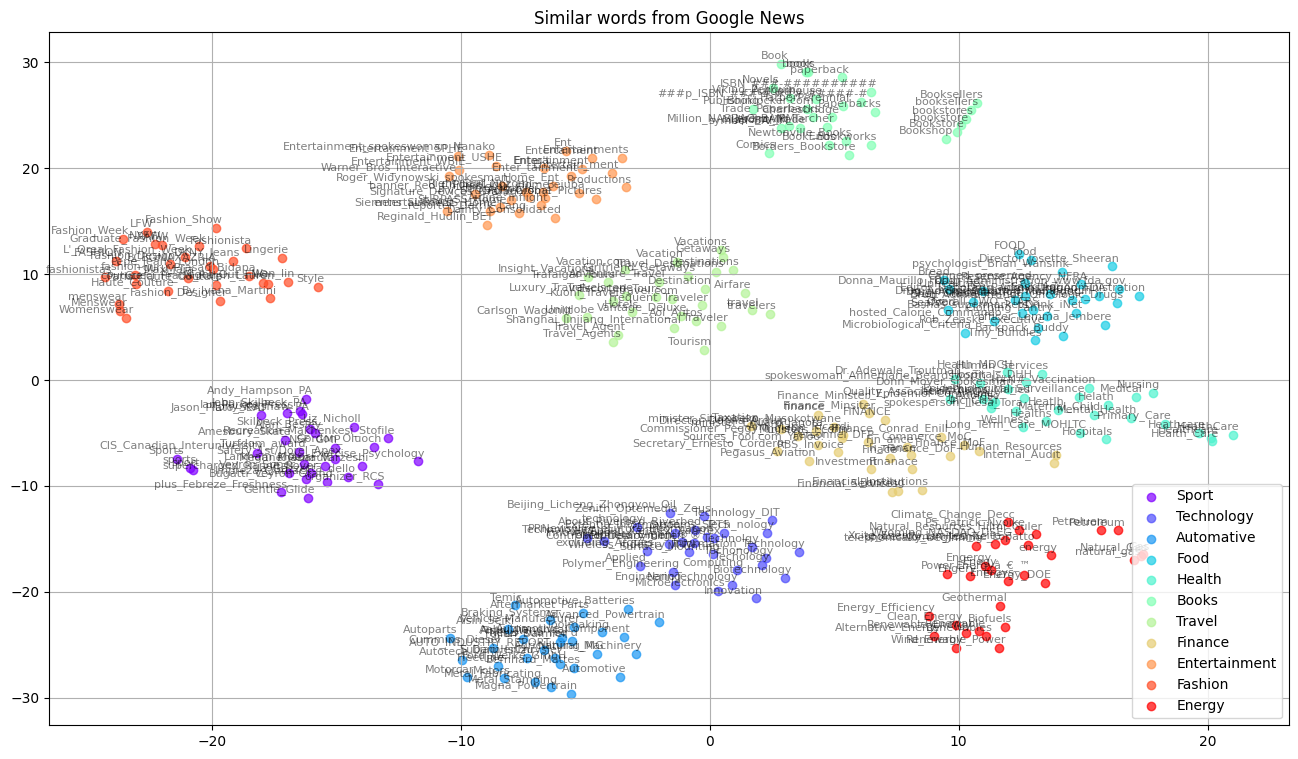

In [63]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [70]:
embeddings_en_2d.shape

(11, 30, 2)

In [83]:
import re 

# def string_to_lowercase(word: str) -> str:
#     sub_words = word.split(' ')
#     def lowercase_subword(word: str) -> str:
#         if word.upper() == word:
#             return word
#         else:
#             return word.lower()
#     return ' '.join([lowercase_subword(x) for x in sub_words])
    

def beautify_word(word: str)-> str:
    s = ' '.join([x for x in word.split('_')])
    return s[0].upper() + s[1:]

# word_clusters
beautified_word_clusters = [[beautify_word(x) for x in l] for l in word_clusters]
print(len(beautified_word_clusters))
print([len(l) for l in beautified_word_clusters])
beautified_word_clusters

11
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]


[['Sports',
  'Turfdom award',
  'Bugatti Veyron Grand',
  'Veyron Super',
  'Tony Kelshaw PA',
  'Skilbeck Press',
  'Alan Besley',
  'Megane Renault',
  'John Skilbeck PA',
  'Larkham Motor',
  'La Gazzetta dello',
  'Ian Parkes Press',
  'Supercharged Range Rover',
  'CIS Canadian Interuniversity',
  'Khabar Varzeshi',
  'Plus Febreze Freshness',
  'Gordon Oluoch',
  'Amesbury Skate',
  'Jason Plato SEAT',
  'Liz Nicholl',
  'NSF GMP',
  'Safety 1st/Dorel Apex',
  'Sports',
  'Organizer RCS',
  'Exercise Psychology',
  'Gentle Glide',
  'Recreation Makhenkesi Stofile',
  'Impreza Outback',
  'Andy Hampson PA',
  'Sport'],
 ['Technolgy',
  'Techonology',
  'Techology',
  'Controlled Deployment',
  'Excluding Arques',
  'Innovation',
  'Technology',
  'Proprietary Eligen ®',
  'Technologies',
  'Applied',
  'Engineering',
  'Tech nology',
  'Systems SPTS',
  'Information Technology',
  'Innovations',
  'About Riverbed Riverbed',
  'Emisphere Eligen ®',
  'PRNewswire eFuture Informatio

In [94]:
output = {}

for iCluster, cluster in enumerate(beautified_word_clusters):
    for iWord, word in enumerate(cluster):
        output[word] = [str(x) for x in list(embeddings_en_2d[iCluster, iWord, :])]

In [95]:
print(output)

{'Sports': ['-20.902782', '-8.315247'], 'Turfdom award': ['-16.513145', '-6.8177624'], 'Bugatti Veyron Grand': ['-15.400375', '-9.59385'], 'Veyron Super': ['-16.924273', '-8.801706'], 'Tony Kelshaw PA': ['-16.379347', '-3.2488558'], 'Skilbeck Press': ['-16.051006', '-4.6616454'], 'Alan Besley': ['-15.852176', '-4.9842286'], 'Megane Renault': ['-15.477675', '-8.140405'], 'John Skilbeck PA': ['-16.44691', '-2.937878'], 'Larkham Motor': ['-16.296095', '-7.9615774'], 'La Gazzetta dello': ['-14.551438', '-9.147381'], 'Ian Parkes Press': ['-16.974579', '-3.1170921'], 'Supercharged Range Rover': ['-16.036705', '-8.832923'], 'CIS Canadian Interuniversity': ['-18.200994', '-6.9236674'], 'Khabar Varzeshi': ['-13.968243', '-8.108956'], 'Plus Febreze Freshness': ['-17.246561', '-10.629241'], 'Gordon Oluoch': ['-13.477665', '-6.344257'], 'Amesbury Skate': ['-17.064583', '-5.6608777'], 'Jason Plato SEAT': ['-18.050692', '-3.3343496'], 'Liz Nicholl': ['-14.278054', '-4.431641'], 'NSF GMP': ['-15.0772

In [96]:
import json

with open('output_embeddings.json', 'w') as file:
    j = json.dumps(output, indent=2)
    file.write(j)